# Big Data Colab Week 2: Intro to Pandas

Welcome to week two of MAGIC's Big Data Colab. This module serves as an introduction to the powerful data science and manipulation library, pandas.

Per their own documentation, pandas is a "fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language."

As mentioned last week, being an independent learner is a large part of being a success programmer. To solve problems, you have to be able to read documenation. The pandas library is a great place to learn that skill. The library is a massive open source project with lots of great [documentation](https://pandas.pydata.org/docs/). 

## Package Overview

As mentioned above, the pandas documentation is really, really great. Because of that I'm not going to try to explain things better than the developers themselves. Any *italicized text* is a snippet taken directly from the documentation.

*pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language.*



In [2]:
import pandas as pd
import numpy as np

## Data Structures in Pandas

Last week you learned about simple data types like integers, strings, lists, and dictionaries. These data structures are provided to you by the python language. However when we're working with more complex datasets, we need more complex (they're not too complex don't worry :) ) data structures.

Pandas provides you with two additional data structures. 
1.   [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html)
2.   [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)





**Series**: You can think of a series as the same as a list data structure where all elements of the list must be the same type (i.e. number, string, list, dict). A series is still indexed like a python list, starting at 0. At its core, a series is just a list optimized for pandas. 

In [ ]:
s = pd.Series([1,2,4,5, np.nan , 6, 8]) # NaN?
p = pd.Series([1, 4, "hey", 6, 7])


lst = ['hey', 'how', 'are', 'you']
q = pd.Series(lst)
s

**2.1)** Using your skills from last week and what you now know about series, concatenate lst with lst2 then make a series from the new longer list.

In [ ]:
##### Your code here. #######
lst = [1,2,3,4,5]
lst2 = [6,7,8,9,10]



**Dataframe**: You can think of a dataframe as a group of series where each series has a label. It helps me to visualize a dataframe as an excel sheet where there are columns of data (i.e. series) with labels. The dataframe would be the entire block of information in the excel sheet. You'll notice below that like a list the rows of a dataframe are also indexed.

In [ ]:
df = pd.DataFrame(
    {
        'Names': ['Sam', 'Paige', 'Casey', 'Max', 'Alec', 'Collin'],
        'Ages': [21, 22, 34, 45, 54, 66],
        'Marital Status': ['Single', 'Married', 'Married', 'Single', 'Married', 'Married']
    }
)

df

,Names,Ages,Marital Status
0,Sam,21,Single
1,Paige,22,Married
2,Casey,34,Married
3,Max,45,Single
4,Alec,54,Married
5,Collin,66,Married


**2.2)** In the space below, a dictionary is defined that maps a string to a list. Add three entries to the dictionary, a name label with a list of names, a favorite food label with a list of foods, and an animal label with a list of favorite animals. Then load the dictionary into a dataframe.

In [ ]:
favs_dict = {}

## Data Exploration in Pandas
The first step in a data science workflow after loading your dataset is to get familiar with the data. Data exploration is important becuase it helps build intution for what the results of your queries and tests should be. Further down the line this could help you spot errors or bugs in your code. Pandas has lots of built in functionality to help you explore a dataset.

In [3]:
# sklearn is another data science library. Here I'm just using it to grab a dataset.
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

First lets consider three things:

1. What does the data [look](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) like?
2.   What are the [ranges](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) of your data? Useful to check for outliers and get a feel for the dataset.
3.   Are there any [missing or invalid values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) in the dataframe?



In [ ]:
# 1) What does the data look like?
df.head(20)
df.tail(10)
df.size

750

In [ ]:
# 2) What are the ranges of the data?
df.describe()

In [ ]:
# 3) Are there any missing or invalid values?
df.isna()
df.isna().any()

**2.3)** In the space below, there is a dataframe that contains data regarding housing in California. Perform a exploratory analysis on the dataframe using the pandas methods shown above. 

In [4]:
housing_df = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Data selection in Pandas

### Selecting Columns
In a large dataframe, it may be useful to display only select columns. This can be done similarly to querying a dict for a certain value. To display certain columns, pass the names of the columns (as a list) to the dataframe.



In [ ]:
iris_df[['sepal length (cm)', 'sepal width (cm)']]

**2.4)** Try out selecting certain columns from the housing dataframe.

In [ ]:
##### YOUR CODE HERE ########

### Selecting Rows
Selecting rows is slightly more complex than selecting columns. For example, you may want to select rows based on an index, a conditions, or even multiple conditions.

To accomplish this, we rely on the `loc` and `iloc` functions. They are similar in name and easy to confuse but provide different functionality.

`iloc`: Looks up rows by index (iloc...i-loc...i-locate...index-locate). Allows you to look up a specific row or a range of rows

`loc`: Looks up rows based on condition(s).

See examples below.

In [ ]:
####### iloc #########

iris_df.iloc[45] # Select individual rows.
iris_df.iloc[1:15] # Select range of rows.
iris_df.iloc[1:15, 1:3] # Select slice of rows and columns.

In [ ]:
####### loc ###########
iris_df.loc[iris_df['sepal length (cm)'] > 5.8]
iris_df.loc[(iris_df['sepal length (cm)'] > 5.8) & (iris_df['petal length (cm)'] > 4.8)]


In [ ]:
iris_df.describe()

### Iterating Over a Dataframe
Much like lists, sometimes its useful to iterate over a Dataframe (i.e. for x in df). However, as you'll see below there are a few tricks to speeding up dataframe iteration. [Here](https://towardsdatascience.com/how-to-make-your-pandas-loop-71-803-times-faster-805030df4f06) is an article with 

In [15]:
# Naive loop. Iterates over Dataframe object in python. 
# Doesnt take advantage of built in C code in pandas.

%%timeit
dummy = 0
for row in range(0, len(iris_df)):
  dummy+= iris_df.iloc[row]['petal width (cm)']

100 loops, best of 3: 15 ms per loop


In [20]:
# Uses pandas functionality and optimized C code.
%%timeit
dummy = 0
for index, row in iris_df.iterrows():
  dummy+=row['petal width (cm)']

100 loops, best of 3: 9.84 ms per loop


In [21]:
# Vectorization. Just iterate and load into memory what we need.
%%timeit
dummy = 0
dummy += iris_df['petal width (cm)']

The slowest run took 195.02 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 127 µs per loop


**2.5)** The california housing dataframe is much larger than the iris dataframe. That means you'll be able to see an even greater difference in performance between the iteration techniques. Try two of the above techniques and timeit!

# Data Visualization
To wrap up this week, we'll take a brief look at [matplotlib](https://matplotlib.org/), a popular libaray used to make both simple and complex visualizations from data. 

In [23]:
import matplotlib.pyplot as plt
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Once you understand how to use the pyplot (python plot) object, its easy to read the documentation and make graphs of any type. As an example, lets make a histogram to see the spread of sepal lengths in the iris_df.

(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10.,  6., 10., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
        6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]),
 <a list of 20 Patch objects>)

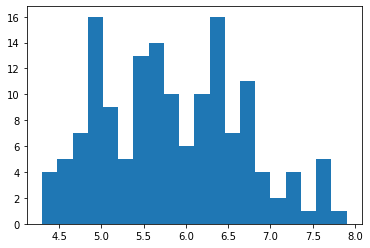

In [27]:
plt.hist(iris_df['sepal length (cm)'], bins=20)

**2.6)** Lets combine our knowledge of plotting with some of the things we learned above. You're curious about the median house value in high density areas of California. Specifically, areas with a population greater than 1000. Write code that creates a histogram of the median house value of for blocks with a population greater than 1000.

First, complete the task using row selection functions (iloc or loc).

Second, complete the task by iterating over the dataframe and adding the median house values to a list (if the population is greater than 1000).

You should construct the same histogram using both methods. Run a timeit to see which version is faster.

In [ ]:
### Create histogram using row selection here.



In [ ]:
### Create histogram using iteration here.


## Project

Last week we saw a series of challenge exercies. This week, instead of exercises, you're going to work through a more complex notebook that does some real COVID-19 analysis. You won't have to write any code, but try your best to understand what is going on. Take some time to follow the author's workflow. Its very similar to the examples you just saw above.

There are certainly going to be functions in the notebook that you haven't seen before. For most people, its impossible to be familiar with the entire pandas library. If you see a function call you don't recognize, look it up in the [documentation](https://pandas.pydata.org/pandas-docs/stable/index.html). If you're still stuck, don't hesistate to drop questions in the slack channel during the week!

[Here](https://colab.research.google.com/github/hugobowne/COVID-19-EDA-tutorial/blob/master/notebooks/1-COVID-19-EDA-solution.ipynb#scrollTo=PttQGSbOp8E7) is the notebook.

If you'd like more Dataframe practice, [here](https://www.w3resource.com/python-exercises/pandas/index-dataframe.php) is a list of problems.